In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../")
# from hps_baseline.greggdataset_loader import load_data, v_key, s_key
from hps_baseline.opensource_loader import load_data, v_key, s_key
from scipy.ndimage import gaussian_filter1d
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d

def load_sw(vk):
    des_qk_sw = np.load("./data/desired_qk_sw_{}.npy".format(vk))
    sw1_qk_sw = np.load("./data/actual_qk_sw1_{}.npy".format(vk))
    sw2_qk_sw = np.load("./data/actual_qk_sw2_{}.npy".format(vk))
    t_sw = np.load("./data/t_sw_{}.npy".format(vk))
    return des_qk_sw, sw1_qk_sw, sw2_qk_sw, t_sw

data1 = load_data(vk="0.8", sk="0",m=70)
q_k1 = gaussian_filter1d(data1[0],2)
t_k1 = gaussian_filter1d(data1[1],2)
q_a1 = gaussian_filter1d(data1[2],2)
t_a1 = gaussian_filter1d(data1[3],2)
des_qk_sw1, sw1_qk_sw1, sw2_qk_sw1, t_sw1 = load_sw(vk=0.8)

data2 = load_data(vk="1.0", sk="0",m=70)
q_k2 = gaussian_filter1d(data2[0],2)
t_k2 = gaussian_filter1d(data2[1],2)
q_a2 = gaussian_filter1d(data2[2],2)
t_a2 = gaussian_filter1d(data2[3],2)
des_qk_sw2, sw1_qk_sw2, sw2_qk_sw2, t_sw2 = load_sw(vk=1.0)


data3 = load_data(vk="1.2", sk="0",m=70)
q_k3 = gaussian_filter1d(data3[0],2)
t_k3 = gaussian_filter1d(data3[1],2)
q_a3 = gaussian_filter1d(data3[2],2)
t_a3 = gaussian_filter1d(data3[3],2)
des_qk_sw3, sw1_qk_sw3, sw2_qk_sw3, t_sw3 = load_sw(vk=1.2)


In [9]:
def cal_gait_division(q_k, q_a, t_k, t_a):
    gait_divisions = []
    idx_max_qa = np.argmax(q_a)
    max_qa = np.max(q_a)
    qa_threshold = max_qa-1
    gait_divisions.append([0, np.where(q_a[:idx_max_qa]>qa_threshold)[0][0]])
    idx_max_ta = np.argmax(t_a)
    max_ta = np.max(t_a)
    ta_threshold = max_ta*1/5
    gait_divisions.append([gait_divisions[-1][1], np.where(t_a[idx_max_ta:80]<ta_threshold)[0][0]+idx_max_ta])
    gait_divisions.append([gait_divisions[-1][1], np.argmax(q_k)])
    gait_divisions.append([gait_divisions[-1][1], q_a.shape[0]])
    return gait_divisions
gd1 = cal_gait_division(q_k1, q_a1, t_k1, t_a1)
gd2 = cal_gait_division(q_k2, q_a2, t_k2, t_a2)
gd3 = cal_gait_division(q_k3, q_a3, t_k3, t_a3)

21.099594395110906
21.099594395110906
22.463883920559198
22.463883920559198
25.326688683160498
25.326688683160498


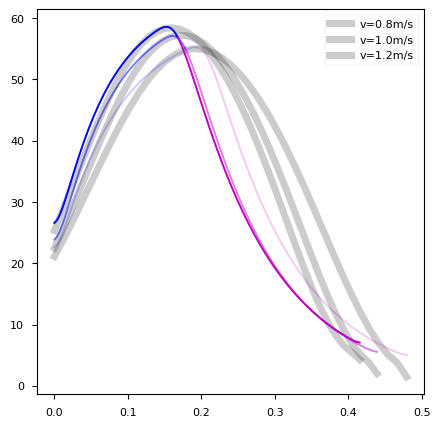

In [10]:
plt.style.use('seaborn-v0_8-paper')
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)
color_list = ['b', 'm']
lstyle_list = [(0,(5,5)), (0,(5,1)), (0,(3,1,1,1))]

def plot_traj(des_sw, sw1, sw2, t_sw, alpha,v_label):
    print(des_sw[0])
    print(sw1[0])
    sw = np.hstack((sw1, sw2))
    fun = interp1d(t_sw, sw, kind='cubic')
    t_new = np.linspace(t_sw[0], t_sw[-1], t_sw1.shape[0]*3)
    idx_division = sw1_qk_sw1.shape[0]*3
    ax1.plot(t_sw, des_sw, color='black', linewidth=5, alpha=0.2,
             label='v={}m/s'.format(v_label))
    sw = gaussian_filter1d(fun(t_new),2)
    # sw = fun(t_new)
    ax1.plot(t_new[:idx_division], sw[:idx_division], color='b', alpha=alpha)
    ax1.plot(t_new[idx_division-1:], sw[idx_division-1:], color='m', alpha=alpha)

    
plot_traj(des_qk_sw1, sw1_qk_sw1, sw2_qk_sw1, t_sw1, alpha=0.2, v_label=0.8)
plot_traj(des_qk_sw2, sw1_qk_sw2, sw2_qk_sw2, t_sw2, alpha=0.5, v_label=1.0)
plot_traj(des_qk_sw3, sw1_qk_sw3, sw2_qk_sw3, t_sw3, alpha=1, v_label=1.2)

ax1.legend()
plt.savefig("../image/sw_qe_mt.pdf")